In [2]:
import librosa

In [3]:
import soundfile as sf

In [4]:
import os

In [5]:
import librosa
import os
import soundfile as sf

def resample_audio(input_path, output_path, target_sr=44100):
    # Load the audio file
    audio, sr = librosa.load(input_path, sr=None)
    
    # Resample the audio to the target sampling rate
    if sr != target_sr:
        audio = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)
    
    # Save the resampled audio
    sf.write(output_path, audio, target_sr)

# List of gun types
gun_names = ['AK-12', 'AK-47', 'IMI Desert Eagle', 'M4', 'M16', 'M249', 'MG-42', 'MP5', 'Zastava M92']

input_base_dir = '../Gunshot_Audio_Dataset/Gunshot_Audio_Dataset_Raw'  # Base input directory
output_base_dir = '../Gunshot_Audio_Dataset/Gunshot_Audio_Dataset_Sampling_Normalized'  # Base output directory

# Create output directory if it doesn't exist
os.makedirs(output_base_dir, exist_ok=True)

print("Processing all gun types...")

for gun_name in gun_names:
    input_directory = os.path.join(input_base_dir, gun_name)
    output_directory = os.path.join(output_base_dir, gun_name)
    
    os.makedirs(output_directory, exist_ok=True)  # Create the output directory for the gun type
    
    for filename in os.listdir(input_directory):
        if filename.endswith('.wav'):
            input_path = os.path.join(input_directory, filename)
            output_path = os.path.join(output_directory, filename)
            resample_audio(input_path, output_path)
            print(f"{filename} resampled and saved to {output_directory}")

print("Resampling completed for all gun types.")


Processing all gun types...
3 (1).wav resampled and saved to ../Gunshot_Audio_Dataset/Gunshot_Audio_Dataset_Sampling_Normalized\AK-12
3 (10).wav resampled and saved to ../Gunshot_Audio_Dataset/Gunshot_Audio_Dataset_Sampling_Normalized\AK-12
3 (11).wav resampled and saved to ../Gunshot_Audio_Dataset/Gunshot_Audio_Dataset_Sampling_Normalized\AK-12
3 (12).wav resampled and saved to ../Gunshot_Audio_Dataset/Gunshot_Audio_Dataset_Sampling_Normalized\AK-12
3 (13).wav resampled and saved to ../Gunshot_Audio_Dataset/Gunshot_Audio_Dataset_Sampling_Normalized\AK-12
3 (14).wav resampled and saved to ../Gunshot_Audio_Dataset/Gunshot_Audio_Dataset_Sampling_Normalized\AK-12
3 (15).wav resampled and saved to ../Gunshot_Audio_Dataset/Gunshot_Audio_Dataset_Sampling_Normalized\AK-12
3 (16).wav resampled and saved to ../Gunshot_Audio_Dataset/Gunshot_Audio_Dataset_Sampling_Normalized\AK-12
3 (17).wav resampled and saved to ../Gunshot_Audio_Dataset/Gunshot_Audio_Dataset_Sampling_Normalized\AK-12
3 (18).wav

In [6]:
import librosa
import os

def check_sampling_rate(directory, expected_sr=44100):
    gun_names = ['AK-12', 'AK-47', 'IMI Desert Eagle', 'M4', 'M16', 'M249', 'MG-42', 'MP5', 'Zastava M92']
    
    for gun_name in gun_names:
        gun_dir = os.path.join(directory, gun_name)
        if not os.path.exists(gun_dir):
            print(f"Directory {gun_dir} does not exist.")
            continue
        
        consistent = True
        file_count = 0  # Keep track of how many files were checked

        for filename in os.listdir(gun_dir):
            if filename.endswith('.wav'):
                file_count += 1
                file_path = os.path.join(gun_dir, filename)
                audio, sr = librosa.load(file_path, sr=None)

                if sr != expected_sr:
                    consistent = False
                    print(f"Inconsistent sampling rate in {filename}: {sr} Hz")
                    break  # Stop checking further if inconsistency is found

        if consistent:
            print(f"All files in {gun_name} have consistent sampling rate.")
        elif file_count == 0:
            print(f"No audio files found in {gun_name}.")

# Example: Check the sampling rate for all files in the output directory
output_directory = '../Gunshot_Audio_Dataset/Gunshot_Audio_Dataset_Sampling_Normalized'
check_sampling_rate(output_directory)


All files in AK-12 have consistent sampling rate.
All files in AK-47 have consistent sampling rate.
All files in IMI Desert Eagle have consistent sampling rate.
All files in M4 have consistent sampling rate.
All files in M16 have consistent sampling rate.
All files in M249 have consistent sampling rate.
All files in MG-42 have consistent sampling rate.
All files in MP5 have consistent sampling rate.
All files in Zastava M92 have consistent sampling rate.


In [ ]:
#Creating spectrogram for normalised sampling rates, but without normalised volume levels:

In [7]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def create_spectrogram(file_path, output_dir, gun_name):
    # Load audio file
    y, sr = librosa.load(file_path, sr=44100)

    # Create the spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)

    # Plot and save the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of {gun_name}')
    plt.tight_layout()

    # Save the spectrogram as an image
    file_name = os.path.basename(file_path).replace('.wav', '.png')
    output_path = os.path.join(output_dir, f"{gun_name}_{file_name}")
    plt.savefig(output_path)
    plt.close()

def process_directory(input_dir, output_dir):
    gun_names = ['AK-12', 'AK-47', 'IMI Desert Eagle', 'M4', 'M16', 'M249', 'MG-42', 'MP5', 'Zastava M92']
    
    for gun_name in gun_names:
        gun_dir = os.path.join(input_dir, gun_name)
        gun_output_dir = os.path.join(output_dir, gun_name)
        
        if not os.path.exists(gun_output_dir):
            os.makedirs(gun_output_dir)
        
        if not os.path.exists(gun_dir):
            print(f"Directory {gun_dir} does not exist.")
            continue
        
        files_processed = 0
        for filename in os.listdir(gun_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(gun_dir, filename)
                create_spectrogram(file_path, gun_output_dir, gun_name)
                files_processed += 1
        
        if files_processed == 0:
            print(f"No audio files found in {gun_name}.")
        else:
            print(f"Processed {files_processed} files for {gun_name}.")

# Example: Process the gunshot audio files
input_directory = '../Gunshot_Audio_Dataset/Gunshot_Audio_Dataset_Sampling_Normalized'
output_directory = '../Gunshot_Audio_Dataset/Gunshot_Spectrograms'
process_directory(input_directory, output_directory)


Processed 98 files for AK-12.
Processed 72 files for AK-47.
Processed 100 files for IMI Desert Eagle.
Processed 100 files for M4.
Processed 100 files for M16.
Processed 99 files for M249.
Processed 100 files for MG-42.
Processed 100 files for MP5.
Processed 82 files for Zastava M92.


In [ ]:
#Creating spectrograms for normalised sampling rates and normalised volume levels also:

In [8]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def normalize_audio(y):
    """Normalize the audio to a range of -1 to 1."""
    return y / np.max(np.abs(y))

def create_spectrogram(file_path, output_dir, gun_name):
    # Load the audio file with a sampling rate of 44100 Hz
    y, sr = librosa.load(file_path, sr=44100)
    
    # Normalize the audio volume
    y_normalized = normalize_audio(y)
    
    # Create the spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y_normalized, sr=sr)
    spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)

    # Plot and save the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of {gun_name}')
    plt.tight_layout()

    # Save the spectrogram as an image
    file_name = os.path.basename(file_path).replace('.wav', '.png')
    output_path = os.path.join(output_dir, f"{gun_name}_{file_name}")
    plt.savefig(output_path)
    plt.close()

def process_directory(input_dir, output_dir):
    gun_names = ['AK-12', 'AK-47', 'IMI Desert Eagle', 'M4', 'M16', 'M249', 'MG-42', 'MP5', 'Zastava M92']
    
    for gun_name in gun_names:
        gun_dir = os.path.join(input_dir, gun_name)
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        
        for filename in os.listdir(gun_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(gun_dir, filename)
                create_spectrogram(file_path, output_dir, gun_name)

# Example: Process the gunshot audio files
input_directory = '../Gunshot_Audio_Dataset/Gunshot_Audio_Dataset_Sampling_Normalized'
output_directory = '../Gunshot_Audio_Dataset/Gunshot Spectrograms/Sampling and Volume Normalized'
process_directory(input_directory, output_directory)


In [9]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

def load_data(data_dir):
    images = []
    labels = []
    
    gun_types = {
        'AK-12': 'AK-12',
        'AK-47': 'AK-47',
        'IMI Desert Eagle': 'IMI Desert Eagle',
        'M4': 'M4',
        'M16': 'M16',
        'M249': 'M249',
        'MG-42': 'MG-42',
        'MP5': 'MP5',
        'Zastava M92': 'Zastava M92'
    }

    print("Loading images...")
    for filename in os.listdir(data_dir):
        if filename.endswith('.png'):
            file_path = os.path.join(data_dir, filename)
            img = image.load_img(file_path, target_size=(128, 128))  # Resize images to 128x128 pixels
            img_array = image.img_to_array(img)
            images.append(img_array)
            
            # Determine the gun type from the filename
            for gun_name in gun_types.keys():
                if gun_name in filename:
                    labels.append(gun_name)
                    break
    
    images = np.array(images, dtype='float32') / 255.0  # Normalize the image data to [0, 1]
    labels = np.array(labels)
    
    # Encode the labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)
    labels_encoded = to_categorical(labels_encoded)
    
    print("Images and labels loaded.")
    return images, labels_encoded, label_encoder

data_directory = '../Gunshot_Audio_Dataset/Gunshot Spectrograms/Sampling and Volume Normalized'
images, labels_encoded, label_encoder = load_data(data_directory)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

# Example: Print the shapes to confirm
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

Loading images...
Images and labels loaded.
Training data shape: (680, 128, 128, 3)
Test data shape: (171, 128, 128, 3)
Training labels shape: (680, 9)
Test labels shape: (171, 9)


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    # 1st Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # 2nd Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # 3rd Convolutional Layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Flatten the output
    layers.Flatten(),

    # Fully Connected Layer
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    # Output Layer with Softmax activation for classification
    layers.Dense(9, activation='softmax')
])

# Summary of the model architecture
model.summary()


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,801 (12.61 MB)

 Trainable params: 3,305,801 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#Compile the Model, We'll use the Adam optimizer and categorical cross-entropy loss, which is suitable for multi-class classification.

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
#Training the Model

from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test), 
                    batch_size=32,
                    callbacks=[early_stopping])


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 202ms/step - accuracy: 0.1114 - loss: 2.7979 - val_accuracy: 0.1345 - val_loss: 2.1950
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - accuracy: 0.1264 - loss: 2.1944 - val_accuracy: 0.1988 - val_loss: 2.1916
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 337ms/step - accuracy: 0.1709 - loss: 2.1834 - val_accuracy: 0.2164 - val_loss: 2.1553
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 290ms/step - accuracy: 0.1828 - loss: 2.1165 - val_accuracy: 0.3041 - val_loss: 2.0053
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 319ms/step - accuracy: 0.2625 - loss: 2.0117 - val_accuracy: 0.2924 - val_loss: 1.9473
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 327ms/step - accuracy: 0.3089 - loss: 1.8768 - val_accuracy: 0.4152 - val_loss: 1.7105
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 277ms/step - accuracy: 0.3612 - loss: 1.7118 - val_accuracy: 0.5088 - val_loss: 1.5332
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 342ms/step - accuracy: 0.4180 - loss: 1.6300 - val_accuracy: 0.

In [13]:
#Evaluate the model using test data

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")



6/6 - 0s - 64ms/step - accuracy: 0.9825 - loss: 0.0435

Test accuracy: 0.9825


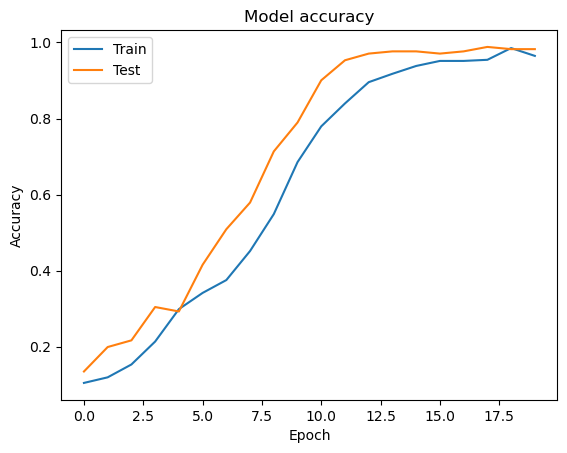

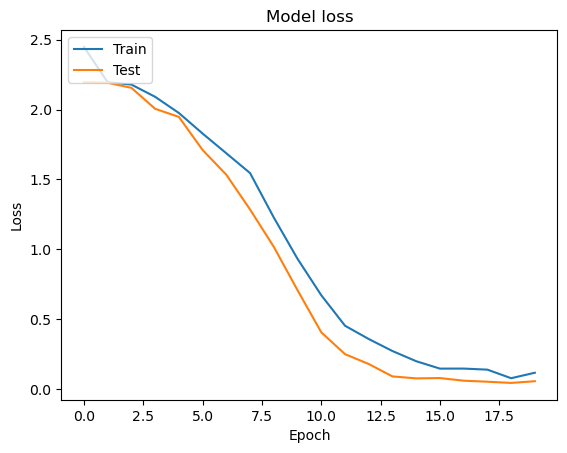

In [14]:
#Plot the Training and Validation Curves

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



In [17]:
import pickle

# Save the trained model
model.save('../Trained_Models/gunshot_model.keras')  # Save in the native Keras format

# Save the label encoder (useful for decoding predictions later)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
